<a href="https://colab.research.google.com/github/Asmaaad37/Machine-Learning/blob/main/Cricket_Analysis%20-%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear Algebra

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Cricket.csv')
df.sample(2)

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
39,40th,"Monday,June 17,2024","Daren Sammy National Cricket Stadium, Gros Isl...",West Indies,Afghanistan,Group C,Afghanistan,Fielding,218,5,...,West Indies,Normal Match,Runs,104,Nicholas Pooran,98,Obed McCoy,3,14,Nicholas Pooran
19,20th,"Sunday,June 9,2024","Sir Vivian Richards Stadium, North Sound, Antigua",Oman,Scotland,Group B,Oman,Batting,150,7,...,Scotland,Normal Match,Wickets,7,Brandon McMullen,31,Chris Greaves,1,2,Brandon McMullen


In [ ]:
df.info()
# Datatype of each column is object so need to deal with it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Match No.                          55 non-null     object
 1   Date                               55 non-null     object
 2   Venue                              55 non-null     object
 3   1st Team                           55 non-null     object
 4   2nd Team                           55 non-null     object
 5   Stage                              55 non-null     object
 6   Toss Winning                       55 non-null     object
 7   Toss Decision                      55 non-null     object
 8   First Innings Score                55 non-null     object
 9   Fall of wickets First Innings      55 non-null     object
 10  Second Innings Score               55 non-null     object
 11  Fall of wickets Second Innings     55 non-null     object
 12  Winners   

In [ ]:
df.describe()

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
count,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
unique,55,26,9,19,18,9,19,3,41,9,...,17,3,3,29,39,38,41,8,28,44
top,1st,"Friday,June 14,2024","Kensington Oval, Bridgetown, Barbados",India,England,Group A,England,Fielding,106,10,...,South Africa,Normal Match,Runs,7,Rain,Rain,Rain,3,16,Rain
freq,1,3,9,6,7,11,6,42,4,16,...,8,48,26,9,4,4,4,25,6,4


In [ ]:
print("Total Stadium Count : ", len(df['Venue'].value_counts()))
stadiums = df['Venue'].value_counts()
stadiums

# The ICC Men's T20 WC was played accross 9 stadiums.

Total Stadium Count :  9


Venue
Kensington Oval, Bridgetown, Barbados                            9
Nassau County International Cricket Stadium, New York            8
Sir Vivian Richards Stadium, North Sound, Antigua                8
Providence Stadium, Guyana                                       6
Daren Sammy National Cricket Stadium, Gros Islet, St Lucia       6
Brian Lara Stadium, Tarouba, Trinidad                            5
Arnos Vale Ground, Kingstown, St Vincent                         5
Grand Prairie Stadium, Dallas                                    4
Central Broward Regional Park Stadium Turf Ground, Lauderhill    4
Name: count, dtype: int64

In [ ]:
df.sample(2)

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
46,47th,"Saturday,June 22,2024","Sir Vivian Richards Stadium, North Sound, Antigua",India,Bangladesh,Group 1,Bangladesh,Fielding,196,5,...,India,Normal Match,Runs,50,Hardik Pandya,50,Kuldeep Yadav,3,19,Hardik Pandya
40,41th,"Wednesday,June 19,2024","Sir Vivian Richards Stadium, North Sound, Antigua",South Africa,United State Of America,Group A,United State Of America,Fielding,194,4,...,South Africa,Normal Match,Runs,18,Quinton de Kock,74,Kagiso Rabada,3,18,Quinton de Kock


In [ ]:
# Checking Rain Affected Stadiums
rain_count_on_stadium = df[df['Method']=='Rain']['Venue'].value_counts()
rain_count_on_stadium
((rain_count_on_stadium*100)/stadiums).dropna()
# 75% of the matches played in Lauderhill were declared by rain.

Venue
Central Broward Regional Park Stadium Turf Ground, Lauderhill    75.000000
Kensington Oval, Bridgetown, Barbados                            11.111111
Name: count, dtype: float64

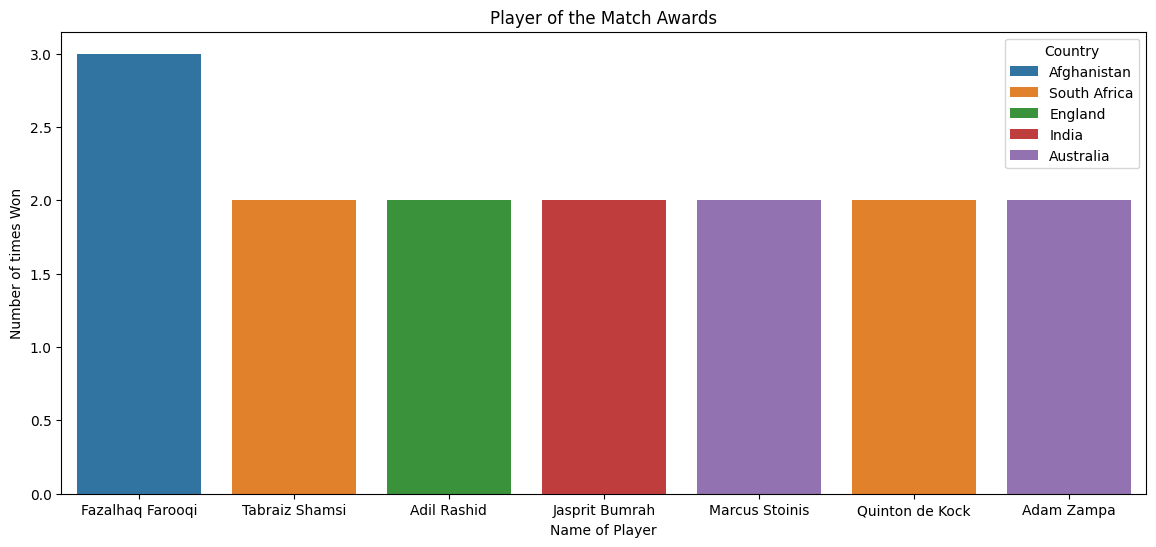

In [ ]:
# Finding Player with most player of the match awards in the tournament and plotting it onto a graph
player_of_match_whole_tour = pd.DataFrame(df['Player Of The Match'].value_counts().drop('Rain', axis=0).reset_index())
player_of_match_whole_tour = player_of_match_whole_tour[player_of_match_whole_tour['count'] >= 2]
player_of_match_whole_tour = pd.merge(player_of_match_whole_tour, df[['Winners', 'Player Of The Match']], on='Player Of The Match', how='inner').drop_duplicates("Player Of The Match", keep='first').reset_index().drop(['index'], axis=1)
(player_of_match_whole_tour.rename({'Winners':"Country"}, axis=1, inplace=True))
player_of_match_whole_tour.index = range(1, len(player_of_match_whole_tour) + 1)
plt.figure(figsize=(14, 6))
sns.barplot(data=player_of_match_whole_tour, x='Player Of The Match', y='count', hue='Country')
plt.title('Player of the Match Awards')
plt.xlabel('Name of Player')
plt.ylabel("Number of times Won")
plt.show()

In [ ]:
# Finding total teams that participated in the tournament
total_teams = []
without_rain = df[~(df['Method']=='Rain')]
tot1 = pd.DataFrame(without_rain['1st Team'].value_counts())
tot2 = pd.DataFrame(without_rain['2nd Team'].value_counts())
tot1.index, tot2.index
[total_teams.append(x) for x in tot1.index]
[total_teams.append(x) for x in tot2.index]

total_teams_index = set(total_teams)
# total_teams_index
print("Total teams participated in the WC : ",len(total_teams_index))

Total teams participated in the WC :  20
